# **AGRILENS : YOUR SMART EYE FOR YOUR HEALTHY CROPS**

## Team ID :
C242-PS157

## Team Member :    
1. M284B4KX0584 – Annisa Shafa Brilianty Lebeharia – Universitas Negeri Surabaya
2. M284B4KY1400 – Farell Hafidz Irkhami – Universitas Negeri Surabaya
3. M284B4KX4158 – Sinta Ayu Dwi Ardita – Universitas Negeri Surabaya
4. C284B4KX3190 – Nabilah Salwa Salsabila – Universitas Negeri Surabaya  
5. C284B4KY3409 – Nur Ahmad Siroj Rohmatillah – Universitas Negeri Surabaya  
6. A284B4KY2935 – Muhammad Luthfi – Universitas Negeri Surabaya
7. A284B4KY4582 – Yusuf Kelvin Siregar – Universitas Negeri Surabaya  


In [ ]:
#Import Library
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#Path Dataset
dataset_path = '/content/drive/MyDrive/Datasets-Capstone/Dataset-Agrilens-1'
train_dataset_path = '/content/drive/MyDrive/Datasets-Capstone/Dataset-Agrilens-1/Train'
val_dataset_path = '/content/drive/MyDrive/Datasets-Capstone/Dataset-Agrilens-1/Validation'
test_dataset_path = '/content/drive/MyDrive/Datasets-Capstone/Dataset-Agrilens-1/Test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Load the dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'Train'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'Validation'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'Test'),
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

Found 1323 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 150 files belonging to 3 classes.


In [ ]:
  # Normalization layer
normalization_layer = layers.Rescaling(1.0 / 255)

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
])

# Preprocess data (apply data augmentation for training, only normalization for validation and test)
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization_layer(x)), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Prefetch for better performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
# Create the CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.InputLayer(shape=(224, 224, 3)),  # Specify input shape here
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(3, activation='softmax')  # Output layer for 3 classes: rust, powdery, healthy
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
# Create and train the model
model = create_cnn_model()

history = model.fit(
    train_dataset,  # Pass the dataset object here
    validation_data=val_dataset,  # Pass the dataset object here
    epochs=10
)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 0.4057 - loss: 2.1554 - val_accuracy: 0.3500 - val_loss: 1.1561
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.6522 - loss: 0.7240 - val_accuracy: 0.7833 - val_loss: 0.5220
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.8130 - loss: 0.4484 - val_accuracy: 0.8000 - val_loss: 0.4012
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 252s 6s/step - accuracy: 0.8794 - loss: 0.3309 - val_accuracy: 0.8333 - val_loss: 0.4905
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.8876 - loss: 0.3363 - val_accuracy: 0.9000 - val_loss: 0.2754
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 237s 6s/step - accuracy: 0.9409 - loss: 0.2047 - val_accuracy: 0.9333 - val_loss: 0.3459
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 273s 6s/step - accuracy: 0.9258 - loss: 0.2143 - val_accuracy: 0.8500 - val_loss: 0.3286
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 262s 6s/step - accuracy: 0.9184 - loss: 0.2574 - val_accuracy: 0.9333 - v

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.9336 - loss: 0.2445
Test Accuracy: 0.9399999976158142
Test Loss: 0.24046051502227783


In [ ]:
# Get the predictions for the test set
y_true = []
y_pred = []

for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # Get true labels
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=["rust", "powdery", "healthy"])

In [ ]:
# Create a folder for saving results in Google Drive
result_folder = '/content/drive/MyDrive/Datasets-Capstone/Dataset-Result/D1'
os.makedirs(result_folder, exist_ok=True)  # Create the folder if it doesn't exist

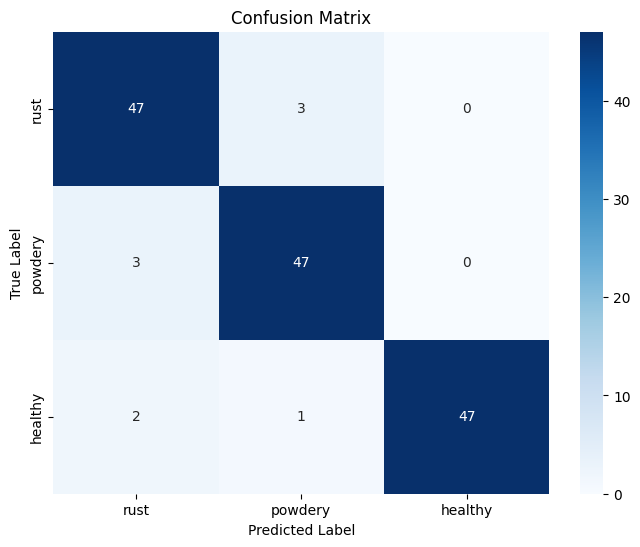

In [ ]:
# Save Confusion Matrix as an image in the result folder
conf_matrix_img_path = os.path.join(result_folder, 'confusion_matrix.png')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["rust", "powdery", "healthy"], yticklabels=["rust", "powdery", "healthy"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig(conf_matrix_img_path)
plt.show()

In [ ]:
# Save Classification Report as a text file in the result folder
classification_report_path = os.path.join(result_folder, 'classification_report.txt')
with open(classification_report_path, 'w') as f:
    f.write(class_report)
    f.write(f"\nTest Accuracy: {test_acc}")
    f.write(f"\nTest Loss: {test_loss}")
print("Classification Report:\n")
print(class_report)

Classification Report:

              precision    recall  f1-score   support

        rust       0.90      0.94      0.92        50
     powdery       0.92      0.94      0.93        50
     healthy       1.00      0.94      0.97        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



In [ ]:
# Save Training History Plots (Accuracy/Loss) in the result folder
history_img_path = os.path.join(result_folder, 'training_history.png')
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

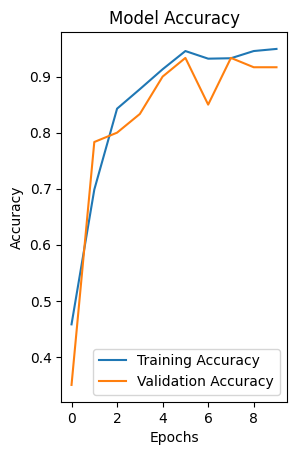

In [ ]:
# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

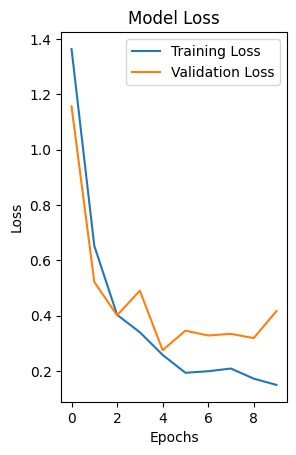

In [ ]:
# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.tight_layout()
plt.savefig(history_img_path)
plt.close()

In [ ]:
# Print paths to the saved files
print(f"Confusion Matrix saved to: {conf_matrix_img_path}")
print(f"Classification Report saved to: {classification_report_path}")
print(f"Training History Plot saved to: {history_img_path}")

Confusion Matrix saved to: /content/drive/MyDrive/Datasets-Capstone/Dataset-Result/D1/confusion_matrix.png
Classification Report saved to: /content/drive/MyDrive/Datasets-Capstone/Dataset-Result/D1/classification_report.txt
Training History Plot saved to: /content/drive/MyDrive/Datasets-Capstone/Dataset-Result/D1/training_history.png
